<h1><center><font size="6">Invasive alien species recognition: lessons learned from applying the iNaturalist 2017 model</font></center></h1>

<center><img src="https://upload.wikimedia.org/wikipedia/commons/0/01/Fauna.jpg" width="800"></img></center>

<br>

# <a id='1'>Content</a>


- <a href='#2'>Introduction</a>  
- <a href='#3'>Data analysis of invasive species dataset</a>  
- <a href='#4'>iNaturalist 2017 list of species</a>   
- <a href='#5'>Test iNaturalist 2017 model to recognize invasive species</a>  
- <a href='#6'>Visualize the results of iNaturalist image recognition</a>  
- <a href='#7'>References</a>




# <a id='2'>Introduction</a>  


Our planet hosts many million species of plants and animals, from which many might look identical. Due to their visual similarity an expert is needed to classify species in the natural world. In the last decade, computer vision (CV) has made significant advancement because of deep learning (DL) algorithms [1]. The image classification of ImageNet dataset precision has risen from 50% in 2011 up to around 88% for Top-1 and 98% of Top-5 accuracy. Top-1 accuracy is the conventional accuracy, which means that the model answer (the one with the highest probability) must be exactly the expected answer. Top-5 accuracy means that any of 5 highest model probability answers must match the expected answer. The iNaturalist Competition is a large-scale species classification competition where the goal is to improve the state of the art in automatic image classification for real-world data [2]. The iNaturalist Challenge 2017 dataset contains 5,089 species, with a combined training and validation set of 675,000 images that have been collected and verified by multiple users from inaturalist.org.

The research objective of the work presented here is to explore the possibility to enhance an editing tool (a mobile application) to recognize Invasive Alien Species (IAS) in Europe with CV capabilities based on iNaturalist 2017 model. The initial idea is to test the iNaturalist 2017 CV model accuracy on an already available European IAS dataset. The European IAS dataset contains 1192 images of 59 distinct IAS gathered by 696 submitted observations. The performed analysis showed that the iNaturalist 2017 CV model can recognize 18 IAS. The IAS sub-dataset of these 18 species contains 65 quality controlled images. The iNaturalist CV 2017 model processed these 65 IAS images and produced results with 35.4% Top-1 and 47.7% Top-5 accuracy. The IAS recognition results are visualized and explained. The paper discusses how to include iNaturalist CV model in IAS Europe App, explore CV model fine-tuning strategies, discuss the current dataset limitations, and possible future cooperation with wider scientific communities. The Python research code is freely available on GitHub [3].




### Load Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import requests
import argparse
import seaborn as sns
%matplotlib inline

## Data analysis of Invasive species data

In [2]:
df_ias= pd.read_csv('../data/EASIN_StatusObservation.csv', delimiter=',',encoding='latin-1')
df_ias.head(10)


Status of the observations  Number of observations
0                  Submitted                       0
1                  Validated                     399
2               Prevalidated                       1
3                    Unclear                      77
4                  Discarded                     217

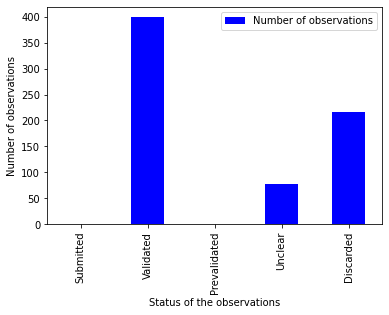

In [3]:
ax=df_ias.plot(kind='bar',x='Status of the observations',y='Number of observations',color=[ 'b', 'b', 'b', 'b', 'b', 'b'])
ax.set_xlabel("Status of the observations")
ax.set_ylabel("Number of observations")
ax.get_figure().savefig('../fig/status_number_observation.png',bbox_inches='tight',ext='png', dpi=200)


# <a id='3'>Data analysis of invasive species dataset</a>  




## Load invasive species dataset

In [4]:
df_2 = pd.read_csv('../data/IASa.csv', delimiter=';',encoding='latin-1')
df_2.head(10)

mongodb_id id_easin             scientific_name  \
0  574ee5281f2e00013cc1c2b1   R12250         Procambarus clarkii   
1  574ee5361f2e00013cc1c2b2   R12250         Procambarus clarkii   
2  57553d9e1f2e00013cc1c2d4   R13698        Sciurus carolinensis   
3  57554e821f2e00013cc1c2d5   R12250         Procambarus clarkii   
4  57554e921f2e00013cc1c2d6   R08062          Lagarosiphon major   
5  57554e971f2e00013cc1c2d7   R13698        Sciurus carolinensis   
6  57554ea31f2e00013cc1c2d9   R13698        Sciurus carolinensis   
7  57554ec61f2e00013cc1c2de   R12250         Procambarus clarkii   
8  57554ece1f2e00013cc1c2df   R12250         Procambarus clarkii   
9  57554ed31f2e00013cc1c2e0   R15970  Vespa velutina nigrithorax   

              common_name      type        family     Status  \
0      Red swamp crayfish  Animalia    Arthropoda  Discarded   
1      Red swamp crayfish  Animalia    Arthropoda  Discarded   
2  American grey squirrel  Animalia      Mammalia  Discarded   
3      Red swamp crayfish  Animalia    Arthropoda  Discarded   
4          African elodea   Plantae  Tracheophyta  Discarded   
5  American grey squirrel  Animalia      Mammalia  Discarded   
6  American grey squirrel  Animalia      Mammalia  Discarded   
7      Red swamp crayfish  Animalia    Arthropoda  Validated   
8      Red swamp crayfish  Animalia    Arthropoda  Discarded   
9    Yellow-legged hornet  Animalia    Arthropoda    Unclear   

                                   image  image_number  photo  
0  R12250_574ee5281f2e00013cc1c2b1_0.jpg             0    NaN  
1  R12250_574ee5361f2e00013cc1c2b2_0.jpg             0    NaN  
2  R13698_57553d9e1f2e00013cc1c2d4_0.jpg             0    NaN  
3  R12250_57554e821f2e00013cc1c2d5_0.jpg             0    NaN  
4  R08062_57554e921f2e00013cc1c2d6_0.jpg             0    NaN  
5  R13698_57554e971f2e00013cc1c2d7_0.jpg             0    NaN  
6  R13698_57554ea31f2e00013cc1c2d9_0.jpg             0    NaN  
7  R12250_57554ec61f2e00013cc1c2de_0.jpg             0    NaN  
8  R12250_57554ece1f2e00013cc1c2df_0.jpg             0    NaN  
9  R15970_57554ed31f2e00013cc1c2e0_0.jpg             0    NaN

## Number of data and atributes

In [5]:
df_2.shape

(1192, 10)

## List of distinct species and their number

In [6]:
list = df_2.scientific_name.unique()
list

array(['Procambarus clarkii', 'Sciurus carolinensis',
       'Lagarosiphon major', 'Vespa velutina nigrithorax',
       'Trachemys scripta',
       'Pueraria montana var. lobata = Pueraria lobata',
       'Cabomba caroliniana', 'Baccharis halimifolia',
       'Heracleum persicum', 'Hydrocotyle ranunculoides',
       'Myriophyllum aquaticum', 'Myocastor coypus', 'Orconectes limosus',
       'Eriocheir sinensis', 'Pseudorasbora parva', 'Perccottus glenii',
       'Eichhornia crassipes', 'Lysichiton americanus',
       'Lithobates catesbeianus', 'Orconectes virilis',
       'Parthenium hysterophorus', 'Persicaria perfoliata',
       'Procyon lotor', 'Heracleum sosnowskyi',
       'Pacifastacus leniusculus', 'Alopochen aegyptiacus',
       'Impatiens glandulifera', 'Alternanthera philoxeroides',
       'Myriophyllum heterophyllum', 'Corvus splendens', 'Nasua nasua',
       'Heracleum mantegazzianum', 'Non EASIN species',
       'Gunnera tinctoria', 'Threskiornis aethiopicus',
       'Sinan

## Number of images of distinct species


In [7]:
len(df_2.scientific_name.unique())

59

In [8]:
df_22=pd.DataFrame(df_2.scientific_name.value_counts()).transpose()


In [9]:
def plot_classes(feature, df, fs=8, show_percents=False, color_palette='Set3'):
    f, ax = plt.subplots(1,1, figsize=(2*fs,4))
    total = float(len(df))
    g = sns.countplot(df[feature], order = df[feature].value_counts().index, palette=color_palette)
    g.set_title(" {}".format(feature))
    if(show_percents):
        for p in ax.patches:
            height = p.get_height()
            ax.text(p.get_x()+p.get_width()/2.,
                    height + 3,
                    '{:1.2f}%'.format(100*height/total),
                    ha="center") 
    g.set_xticklabels(g.get_xticklabels(), rotation=90, horizontalalignment='right')
    plt.show() 
    return f
    #f.savefig("figures-output/IAS_number_of_images_per_species.png", bbox_inches='tight', dpi=600)

## Plot number of labels and images of each class in Invasive Species dataset

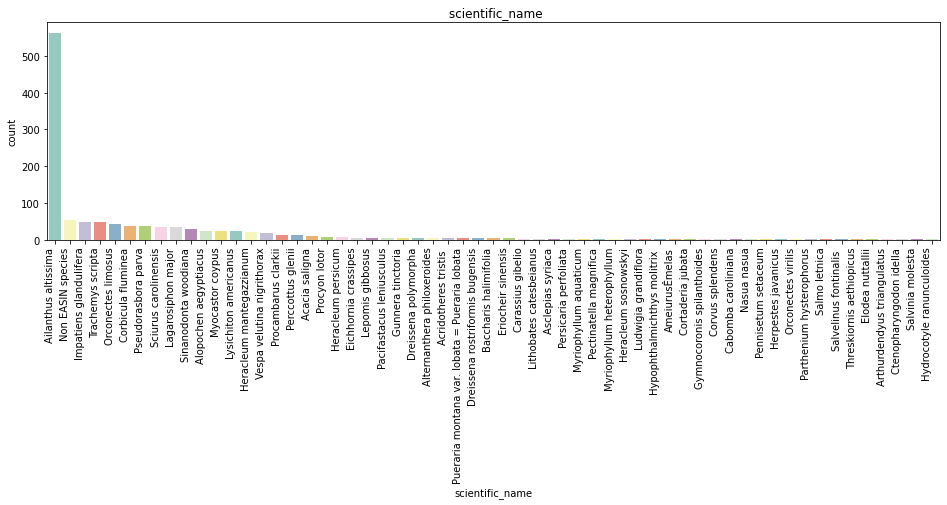

FileNotFoundError: [Errno 2] No such file or directory: '..fig/IAS_number_of_images_per_species.png'

In [10]:
f=plot_classes('scientific_name',df_2)
f.savefig("..fig/IAS_number_of_images_per_species.png", bbox_inches='tight', dpi=100)

## Results in table view

In [ ]:
df_2['scientific_name'].value_counts()


# <a id='1'>iNaturalist 2017 list of species</a>  

In [11]:
df_3=pd.read_csv('../data/iNat-2017.csv')

## How many invasive species are cross-checking with  the iNaturalist 2017 list of species

In [18]:
df_n=pd.merge(df_2, df_3,how='inner', on='scientific_name')


In [19]:
len(df_n['scientific_name'].value_counts())

18

## Which are the invasive species that cross-check and how many images they have 

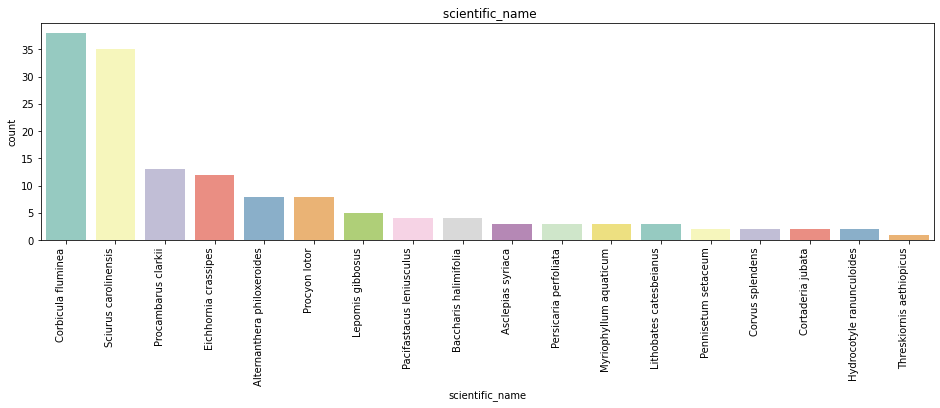

In [20]:
f=plot_classes('scientific_name',df_n)
f.savefig("../fig/cross-check.png", bbox_inches='tight', dpi=300)

In [21]:
df_n

mongodb_id id_easin      scientific_name  \
0    574ee5281f2e00013cc1c2b1   R12250  Procambarus clarkii   
1    574ee5361f2e00013cc1c2b2   R12250  Procambarus clarkii   
2    57554e821f2e00013cc1c2d5   R12250  Procambarus clarkii   
3    57554ec61f2e00013cc1c2de   R12250  Procambarus clarkii   
4    57554ece1f2e00013cc1c2df   R12250  Procambarus clarkii   
..                        ...      ...                  ...   
143  5debe3381d2b6741a2e01f4c   R04013   Corbicula fluminea   
144  5dc91b3445d0d0f20cec61a9   R19708    Cortaderia jubata   
145  5dc91b3445d0d0f20cec61a9   R19708    Cortaderia jubata   
146  5dcd2d7614ca6438c35e7957   R03000  Pennisetum setaceum   
147  5dcd2d7614ca6438c35e7957   R03000  Pennisetum setaceum   

            common_name      type        family     Status  \
0    Red swamp crayfish  Animalia    Arthropoda  Discarded   
1    Red swamp crayfish  Animalia    Arthropoda  Discarded   
2    Red swamp crayfish  Animalia    Arthropoda  Discarded   
3    Red swamp crayfish  Animalia    Arthropoda  Validated   
4    Red swamp crayfish  Animalia    Arthropoda  Discarded   
..                  ...       ...           ...        ...   
143     Scoica asiatic_  Animalia    Arthropoda  Validated   
144         Pampa grass   Plantae  Tracheophyta    Unclear   
145         Pampa grass   Plantae  Tracheophyta    Unclear   
146      Fountain grass   Plantae  Tracheophyta  Validated   
147      Fountain grass   Plantae  Tracheophyta  Validated   

                                     image  image_number  photo  
0    R12250_574ee5281f2e00013cc1c2b1_0.jpg             0    NaN  
1    R12250_574ee5361f2e00013cc1c2b2_0.jpg             0    NaN  
2    R12250_57554e821f2e00013cc1c2d5_0.jpg             0    NaN  
3    R12250_57554ec61f2e00013cc1c2de_0.jpg             0    NaN  
4    R12250_57554ece1f2e00013cc1c2df_0.jpg             0    NaN  
..                                     ...           ...    ...  
143  R04013_5debe3381d2b6741a2e01f4c_0.jpg             0    NaN  
144  R19708_5dc91b3445d0d0f20cec61a9_0.jpg             0    NaN  
145  R19708_5dc91b3445d0d0f20cec61a9_1.jpg             1    NaN  
146  R03000_5dcd2d7614ca6438c35e7957_0.jpg             0    NaN  
147  R03000_5dcd2d7614ca6438c35e7957_1.jpg             1    NaN  

[148 rows x 10 columns]

## Select only the validated images from the invasive species dataset

Further in the analysis only the validated images from the invasive species dataset are used. Invasive species with other status are discarded.

In [22]:
df_f=df_n.loc[df_n['Status']== 'Validated', ['scientific_name','image']]

In [23]:
df_f=df_f.drop_duplicates()

In [24]:
df_f

scientific_name                                  image
3     Procambarus clarkii  R12250_57554ec61f2e00013cc1c2de_0.jpg
6     Procambarus clarkii  R12250_57a85ee71f2e00013cc1c34d_0.jpg
9     Procambarus clarkii  R12250_5bdc83f8de386109b1dabd1d_0.jpg
12    Procambarus clarkii  R12250_5d4fdda0969578791a73d932_0.jpg
17   Sciurus carolinensis  R13698_58a46554482da315695c716b_0.jpg
..                    ...                                    ...
141    Corbicula fluminea  R04013_5debb1691d2b6741a2e01f3f_0.jpg
142    Corbicula fluminea  R04013_5debd4301d2b6741a2e01f4a_0.jpg
143    Corbicula fluminea  R04013_5debe3381d2b6741a2e01f4c_0.jpg
146   Pennisetum setaceum  R03000_5dcd2d7614ca6438c35e7957_0.jpg
147   Pennisetum setaceum  R03000_5dcd2d7614ca6438c35e7957_1.jpg

[65 rows x 2 columns]

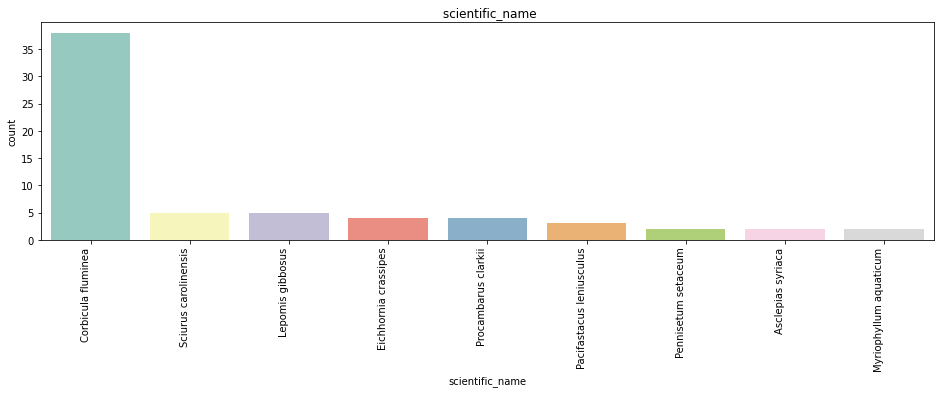

In [25]:
f=plot_classes('scientific_name',df_f)
f.savefig("../fig/cross-check_65.png", bbox_inches='tight', dpi=300)

# <a id='5'>Test of the iNaturalist 2017 image recognition model in recognizing invasive species</a>  

At this point we have selected 65 images of invasive species that are validated and that are species that are found in the iNaturalist dataset. The species that are found in the iNaturalist 2017 dataset can be recognized by the iNaturalist image recognition model. Below we are going to test the iNaturalist 2017 image recognition model capabilities in recognizing invasive species. 

# Start python flask server 

Execute python run_pytorch_server.py

This will create a local flask python server. The server has very simple API that receive an image as input and as output returns iNaturalist 2017 image recognition model top five prediction of the invasive species in the image. 

In [26]:
from os import listdir
from os.path import isfile, join

URL = 'http://127.0.0.1:5000/predict'

## Send image to server and get results

In [51]:
def predict_result(image_path):
    # Initialize image path
    mypath='../datasets/'
    image = open(mypath+image_path, 'rb').read()
    payload = {'image': image}
    output_string=''
    r = requests.post(URL, files=payload).json()

    # Ensure the request was successful.
    if r['success']:
        # Loop over the predictions and display them.
        #print(image_path,end ="\t")
        output_string=output_string+image_path +';'
        
        for (i, result) in enumerate(r['predictions']):
            #print(' {}: {:.4f}'.format(result['label'],result['probability']),end ="\t")
            output_string=output_string+'{}'.format(result['label'])+';' +'{:.4f}'.format(result['probability'])+';'
    
        
        #print(output_string)
    # Otherwise, the request failed.
    else:
        print('Request failed')
    
    return output_string

## The results are saved in a file.

In [54]:
output_all=''
for x in df_f['image']:
    #print(x)
    string = predict_result(x)
    #string=''
    output_all=output_all+string+ '\n'
    
#print(output_all)

text_file = open("..\data\Output-fin.csv", "w")
text_file.write(output_all)
text_file.close()


NameError: name 'predict_result' is not defined

## Open results and save it in dataframe

The table attributes are:
- 'Image' - the invasive species image name. 
- P1 - iNaturalist 2017 model first prediction. 
- Q1 - First prediction probability.
- P2 - iNaturalist 2017 model second prediction. 
- Q2 - Second prediction probability.
- ...

- Q6 - Six prediction probability


In [27]:
header_list = ['image', 'P1', 'Q1','P2', 'Q2','P3', 'Q3','P4', 'Q4','P5', 'Q5','P6', 'Q6']
df_predict = pd.read_csv('..\data\Output-fin.csv', delimiter=';',names=header_list, index_col=False)
df_predict

image                    P1      Q1  \
0   R12250_57554ec61f2e00013cc1c2de_0.jpg   Procambarus clarkii  0.9133   
1   R12250_57a85ee71f2e00013cc1c34d_0.jpg     Castor canadensis  0.1997   
2   R12250_5bdc83f8de386109b1dabd1d_0.jpg    Terrapene carolina  0.0975   
3   R12250_5d4fdda0969578791a73d932_0.jpg   Procambarus clarkii  0.7797   
4   R13698_58a46554482da315695c716b_0.jpg  Sciurus carolinensis  0.9999   
..                                    ...                   ...     ...   
60  R04013_5debb1691d2b6741a2e01f3f_0.jpg    Psilocybe cubensis  0.1413   
61  R04013_5debd4301d2b6741a2e01f4a_0.jpg    Corbicula fluminea  1.0000   
62  R04013_5debe3381d2b6741a2e01f4c_0.jpg    Turdus migratorius  0.0964   
63  R03000_5dcd2d7614ca6438c35e7957_0.jpg    Taxodium distichum  0.7301   
64  R03000_5dcd2d7614ca6438c35e7957_1.jpg           Carex secta  0.9889   

                            P2      Q2                         P3      Q3  \
0      Paranephrops planifrons  0.0456            Jasus edwardsii  0.0212   
1             Myocastor coypus  0.0848          Lontra canadensis  0.0632   
2          Carduelis carduelis  0.0435        Anaxyrus americanus  0.0339   
3         Phytolacca americana  0.1768         Romalea microptera  0.0106   
4               Sciurus alleni  0.0001            Sciurus griseus  0.0000   
..                         ...     ...                        ...     ...   
60  Calvia quatuordecimguttata  0.1056  Stropharia rugosoannulata  0.0452   
61                Dosinia anus  0.0000        Nuttallia obscurata  0.0000   
62     Lithobates catesbeianus  0.0876       Lithobates clamitans  0.0770   
63       Dacrydium cupressinum  0.1936        Taxodium mucronatum  0.0407   
64         Muhlenbergia rigens  0.0048              Nolina texana  0.0024   

                           P4      Q4                       P5      Q5  \
0          Homarus americanus  0.0050   Grapsus tenuicrustatus  0.0030   
1             Tamias striatus  0.0512  Sceloporus occidentalis  0.0363   
2       Lithobates sylvaticus  0.0245         Bombus ternarius  0.0162   
3             Chrysemys picta  0.0085          Battus philenor  0.0083   
4         Sciurus arizonensis  0.0000  Tamiasciurus hudsonicus  0.0000   
..                        ...     ...                      ...     ...   
60        Abortiporus biennis  0.0451         Phallus hadriani  0.0297   
61  Calliostoma canaliculatum  0.0000    Betula alleghaniensis  0.0000   
62             Apis mellifera  0.0449      Anaxyrus americanus  0.0342   
63       Tillandsia usneoides  0.0133  Casuarina equisetifolia  0.0073   
64            Cyperus papyrus  0.0016    Austroderia richardii  0.0005   

                          P6      Q6  
0        Potamogeton crispus  0.0012  
1       Dasypus novemcinctus  0.0319  
2       Lithobates clamitans  0.0150  
3           Farancia abacura  0.0074  
4       Sciurus yucatanensis  0.0000  
..                       ...     ...  
60        Erethizon dorsatum  0.0259  
61         Lampsilis cardium  0.0000  
62          Sturnus vulgaris  0.0284  
63  Eucalyptus camaldulensis  0.0038  
64  Muhlenbergia lindheimeri  0.0004  

[65 rows x 13 columns]

## Merge results with validated images dataset

With merging validated images dataset with the iNaturalist 2017 prediction dataset it is possible to evaluate the iNaturalist 2017 image recognition model capabilities. We are going to calculate the first hit which means that the iNaturalist 2017 image recognition model has succesifuly identified the invasive specie. The second evaluation is if the iNaturalist 2017 image recogntion model has successifuly identified the invasive species among his five top predictions. 

In [28]:
df=pd.merge(df_predict, df_f,how='inner', on='image')

## Calculate 1 hit and 5 hits and add it to the dataset

In [29]:
df['1_hit'] = df['P1']==df['scientific_name']
df['2_hit'] = df['P2']==df['scientific_name']
df['3_hit'] = df['P3']==df['scientific_name']
df['4_hit'] = df['P4']==df['scientific_name']
df['5_hit'] = df['P5']==df['scientific_name']

In [30]:
df['Total_5_hit'] = df['1_hit']|df['2_hit']|df['3_hit']|df['4_hit']|df['5_hit']

### Total 1 hits value count

In [31]:
t1=df['1_hit'].value_counts()

In [32]:
t1

False    42
True     23
Name: 1_hit, dtype: int64

### Total 5 hits value count

In [33]:
t2=df['Total_5_hit'].value_counts()

In [34]:
t2

False    34
True     31
Name: Total_5_hit, dtype: int64

## Pie chart of iNaturalist image recognition 

The pie chart shows that 35.4% of the Invasive species were sucessifully recognized by the iNaturalist 2017 image recognition model. Additionaly, 12.3% of the Invasive species were recognized by the iNaturalist 2017 model in the first 5 predictions. The rest 52.3% of the images were not recognized. There are 65 validate invasive species images in total. 

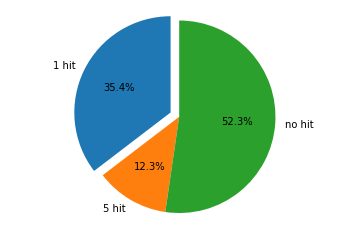

In [35]:


# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = '1 hit', '5 hit', 'no hit'
sizes = [t1[1]/len(df.index), 
         t2[1]/len(df.index)-t1[1]/len(df.index),  
         1- t2[1]/len(df.index)]
explode = (0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=False, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

fig1.savefig("../fig/hits_perc.png", bbox_inches='tight', dpi=300)

## Dataframe containing all the results of the iNaturalist model image recognition

- image is the name of the Invasive Species image file
- P1 is the first prediction by the iNaturalist 2017 model
- Q1 is the probability of the first prediction
- P2 is the second ..
- ...
- scientific_name is the validate image name
- 1_hit shows did the iNaturalist model succeed
- 2_hit 
- ...

In [36]:
df
df.to_csv(r'../data/data_frame_11.csv', index =  True, sep = ';')

### additional analysis is requred to understand the Q1-Q5 probabilities 

# <a id='6'>Visualize the results of iNaturalist image recognition</a>  

##  iNaturalist 2017 dataset images links

The iNaturalist 2017 has a table with sample images that can be seen here.
https://docs.google.com/spreadsheets/d/1JHn6J_9HBYyN5kaVrH1qcc3VMyxOsV2II8BvSwufM54/edit#gid=0

The vast majority of images are not found in the iNaturalist 2017 image dataset sample; the links don't work.It could be because the Invasive species have quite few images. This needs to be investigated. 

In [37]:
df_iNat2017=pd.read_csv('../data/iNat-cut.csv', delimiter=';')

In [38]:
df_iNat2017.rename(columns={'Category name':'scientific_name',}, 
                 inplace=True)

df_i=df_iNat2017[['scientific_name', 'Image URL']]

In [39]:
df_i

scientific_name  \
0                              Marmota flaviventris   
1                              Zonotrichia capensis   
2                                 Nerodia cyclopion   
3     Prosthemadera novaeseelandiae novaeseelandiae   
4                                    Vanellus miles   
...                                             ...   
5084                          Murgantia histrionica   
5085                           Collomia grandiflora   
5086                                  Columba livia   
5087                              Notarctia proxima   
5088                              Piranga bidentata   

                                              Image URL  
0     https://farm1.staticflickr.com/68/185318245_47...  
1     https://farm3.staticflickr.com/2248/2195772708...  
2     https://farm6.staticflickr.com/5225/5691167204...  
3     https://static.inaturalist.org/photos/1179556/...  
4     https://farm4.staticflickr.com/3252/2313697721...  
...                                                 ...  
5084  http://api.gbif.org/v1/image?url=http%3A%2F%2F...  
5085                                                NaN  
5086  http://api.gbif.org/v1/image?url=http%3A%2F%2F...  
5087                                                NaN  
5088  http://api.gbif.org/v1/image?url=http%3A%2F%2F...  

[5089 rows x 2 columns]

## Function to retrieve images online
 input is the scientific name of the species; and the dataset that contains the Internet links 
 
 output is the image

In [61]:
def retreive_image_online(scientific_name, df_i):
    from PIL import Image
    import requests
    from io import BytesIO
    k=1
    pd.set_option("display.max_colwidth", 10000)
    df=df_i.loc[df_i['scientific_name'] == scientific_name, ['scientific_name','Image URL']]
    #print (df)
    try:
        response = requests.get((df['Image URL'].iloc[0]).replace('amp;',''))
        img = Image.open(BytesIO(response.content))
    except:
        #print("Something went wrong")
        img = load_img('../dataset/1.jpg')
    finally:
        k=k+1
    return img

## Retreive images from iNaturalist online

The list of all invasive species are downloaded and saved in folder. 

In [62]:
mylist1 = df['P1'].tolist()+df['P2'].tolist()+df['P3'].tolist()+df['P4'].tolist()+df['P5'].tolist()+ df['scientific_name'].tolist()
k=0
for i in mylist1:
    try:
        #print(i)
        img=retreive_image_online(i, df_i)
        img.save('../dataset/'+i+'.jpg')
    except:
        k=k+1    

## Visualise results 

The results shown below are from the dataframe containing these images

- Validated image from the Invasive species 
- First predicted image downloaded from iNaturalist with its name
- Second predicted image downloaded from iNaturalist
- Third
- Fourth
- Fifth

Unfortunately most of the images retrieved from the iNaturalist list are not accessible therefore it is an empty image. Solution for this problem is to download the entire iNaturalist dataset and search for this exact species and show their image from there.

The iNaturalist images missing are shown as blank image.

This will be done in later stage when further training of the dataset is planned. 



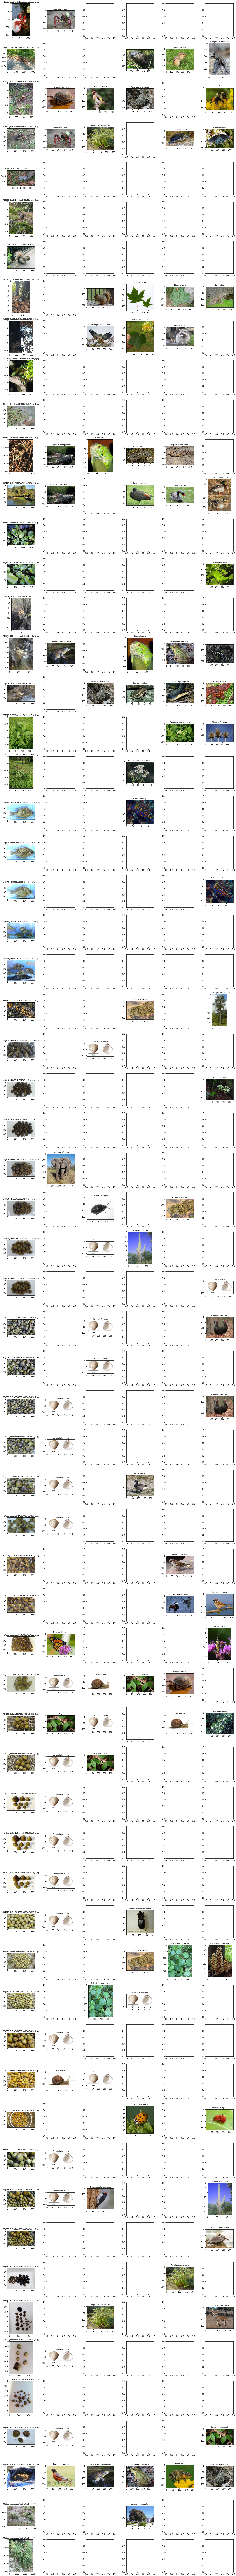

In [63]:
image_path='../datasets/'
from PIL import Image
import requests
from io import BytesIO
pd.set_option("display.max_colwidth", 10000)
cols=6
IMAGE_PATH='../datasets/'
IMAGE_PATH1='../dataset/'

notting=0


f, ax = plt.subplots(nrows=len(df['image']),ncols=cols, figsize=(3*cols,3*len(df['image'])))
for i, cat in enumerate(df['image']):
        #sample = train_df[train_df[var]==cat].sample(cols)
        
        
        file=IMAGE_PATH + df['image'][i]
        #print(file)
        im = Image.open(file)
        ax[i, 0].imshow(im, resample=True)
        ax[i, 0].set_title(df['image'][i], fontsize=9) 
        for j in range(1,cols):       
            try:
                file=IMAGE_PATH1 + df['P'+str(j)][i]+'.jpg'
                im1 = Image.open(file)
                ax[i, j].imshow(im1, resample=True)
                ax[i, j].set_title(df['P'+str(j)][i], fontsize=9) 
               
            except:
                notting=notting+1
     

plt.tight_layout()
plt.show()
#f.savefig("figures-output/visualiztion.png", bbox_inches='tight', dpi=200)

## image for publishing

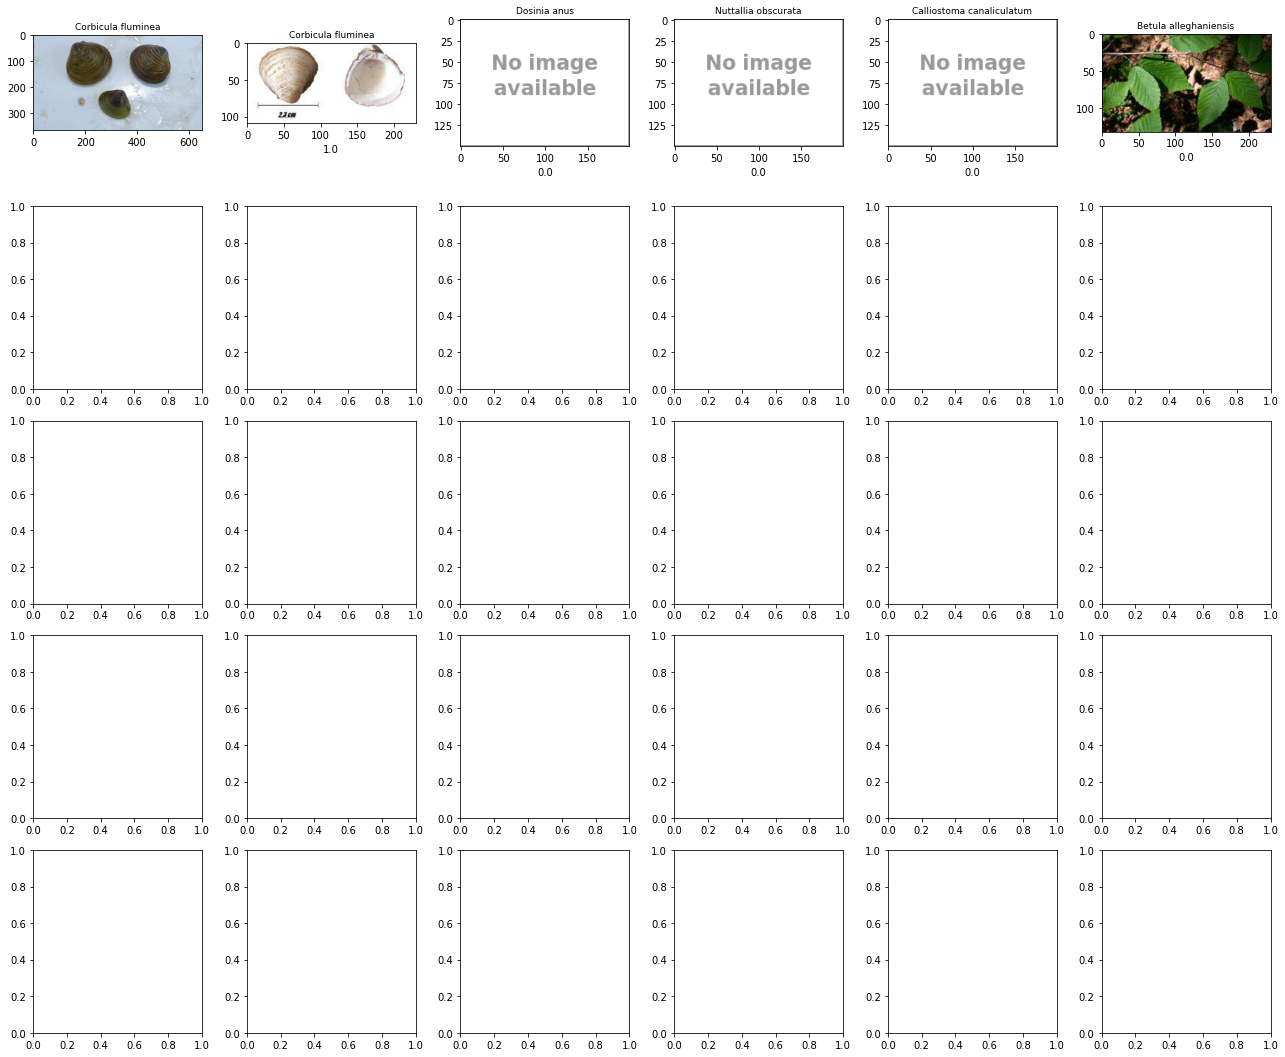

In [64]:
image_path='../datasets/'
from PIL import Image
import requests
from io import BytesIO
pd.set_option("display.max_colwidth", 10000)
cols=6
IMAGE_PATH='../datasets/'
IMAGE_PATH1='../dataset/'

notting=0

k=0
f, ax = plt.subplots(nrows=5,ncols=cols, figsize=(3*cols,15))
for i, cat in enumerate(df['image']):
        #sample = train_df[train_df[var]==cat].sample(cols)
        #print (i)
        
        if (i==11)or(i==26)or(i==3)or(i==61)or(i==29):
        #if (i==11)or(i==2)or(i==3)or(i==43)or(i==29):
            
            #print(file)
            file=IMAGE_PATH + df['image'][i]
            im = Image.open(file)
            ax[k, 0].imshow(im, resample=True)
            ax[k, 0].set_title(df['scientific_name'][i], fontsize=9) 
            for j in range(1,cols):       
                try:
                    #print(i)
                    file1=IMAGE_PATH1 + df['P'+str(j)][i]+'.jpg'
                    im1 = Image.open(file1)
                    
                except:
                    file1=IMAGE_PATH1 +'No_image.png'
                    im1 = Image.open(file1)
                        
                #finally: 
                    
                
                ax[k, j].imshow(im1, resample=True)
                ax[k, j].set_title(df['P'+str(j)][i], fontsize=9) 
                ax[k, j].set_xlabel(df['Q'+str(j)][i])
                
            k=k

plt.tight_layout()
plt.show()
f.savefig('../fig/vis.png', bbox_inches='tight', dpi=300)

# <a id='7'>References</a>  


[1] https://www.kaggle.com/gpreda/honey-bee-subspecies-classification   
[2] https://www.kaggle.com/gpreda/robots-need-help  
[3] https://www.kaggle.com/artgor/iwildcam-basic-eda  
[4] https://www.kaggle.com/c/iwildcam-2019-fgvc6/  
[5] https://www.kaggle.com/xhlulu/keras-cnn-starter-petfinder/  
[6] https://www.kaggle.com/xhlulu/reducing-image-sizes-to-32x32  
[7] https://medium.com/@thongonary/how-to-compute-f1-score-for-each-epoch-in-keras-a1acd17715a2  
[8] https://www.kaggle.com/xhlulu/cnn-baseline-iwildcam-2019  
[9] https://www.kaggle.com/xhlulu/densenet-transfer-learning-iwildcam-2019/  
[10] https://www.kaggle.com/gpreda/cats-or-dogs-using-cnn-with-transfer-learning


https://www.kaggle.com/dimitreoliveira/flower-classification-with-tpus-eda-and-baseline/data?
https://www.kaggle.com/gpreda/iwildcam-2019-eda-and-prediction